# Jugando con imágenes

En este Jupyter Notebook la idea es probar los conceptos basicos de trabajar con imagenes usando scikit-image (https://anaconda.org/anaconda/scikit-image)

In [1]:
# Probamos que tenemos la libreria
from skimage import data
import matplotlib.pyplot as plt
import numpy as np

rocket_image = data.rocket()

plt.imshow(rocket_image)
plt.title("Cohete")
plt.axis('off')
plt.show()

<Figure size 640x480 with 1 Axes>

### 1- Primeros pasos

Cargar una imagen

In [2]:
# La ruta de mi imagen
ruta = "datasets/Imagenes/gato.jpg"

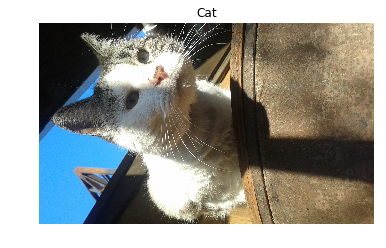

In [3]:
gato = plt.imread(ruta)
plt.imshow(gato)
plt.title("Cat")
plt.axis('off')
plt.show()

Giramos la imagen

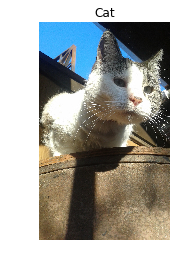

In [4]:
gato = np.rot90(gato, k=1, axes=(1, 0))
plt.imshow(gato)
plt.title("Cat")
plt.axis('off')
plt.show()

Podemos pasar la imagen a blanco y negro

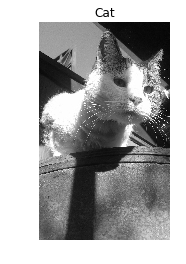

In [5]:
from skimage import color
gato_grayscale = color.rgb2gray(gato)

# Debemos agregar el argumento cmap, de otra forma se verá como un mapa de calor
plt.imshow(gato_grayscale, cmap="gray")
plt.title("Cat")
plt.axis('off')
plt.show()

### 2- Colores y formas

Las imagenes estan compuesta por una variaciòn de tres colores RGB (red-green-blue)

[]

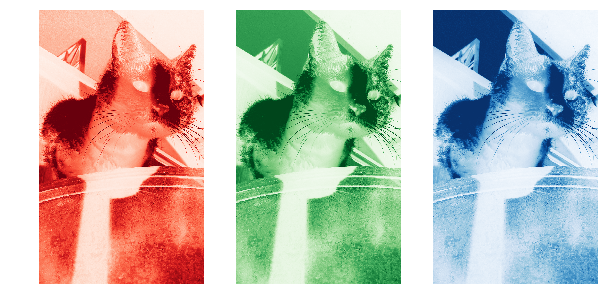

In [6]:
red_cat = gato[:,:,0]
green_cat = gato[:,:,1]
blue_cat = gato[:,:,2]

# plt.axis nos permite desactivar los ejes en cada una de las figuras
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(red_cat, cmap="Reds")
plt.axis('off')
ax2 = fig.add_subplot(1,3,2)
ax2.imshow(green_cat, cmap="Greens")
plt.axis('off')
ax3 = fig.add_subplot(1,3,3)
ax3.imshow(blue_cat, cmap="Blues")
plt.axis('off')
plt.plot()

Podemos ver tambien los histogramas de los colores que hay detras de las imagenes

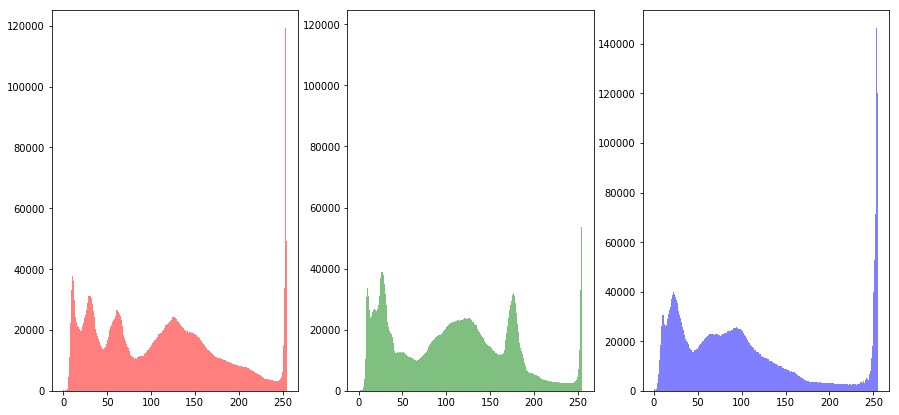

In [7]:
# Transformamos cada valor a un array
red_cat_array = red_cat.ravel()
green_cat_array = green_cat.ravel()
blue_cat_array = blue_cat.ravel()

# Ploteamos los histogramas
fig, ax = plt.subplots(1, 3, figsize=(15,7))
ax[0].hist(red_cat_array, bins=256, color="r", alpha=0.5)
ax[1].hist(green_cat_array, bins=256, color="g", alpha=0.5)
ax[2].hist(blue_cat_array, bins=256, color="b", alpha=0.5)
plt.show()

### 3- Thresholding

La idea detrás del concepto thresholding es dividir una imagen entre el fondo y la forma propiamente tal. Para eso, desde un pixel en particular, se considera 1 y antes de ese 0

Lo primero es pasar la imagen a blanco y negro

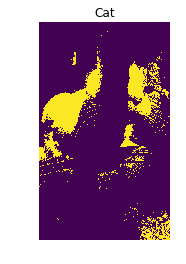

In [8]:
from skimage import color
gato_grayscale = color.rgb2gray(gato)

# Definimos el numero thresh
thresh = 0.7
binary = gato_grayscale > thresh

plt.imshow(binary)
plt.title("Cat")
plt.axis('off')
plt.show()

Existen otros tipos de thresholding que vienen en la libreria skimage

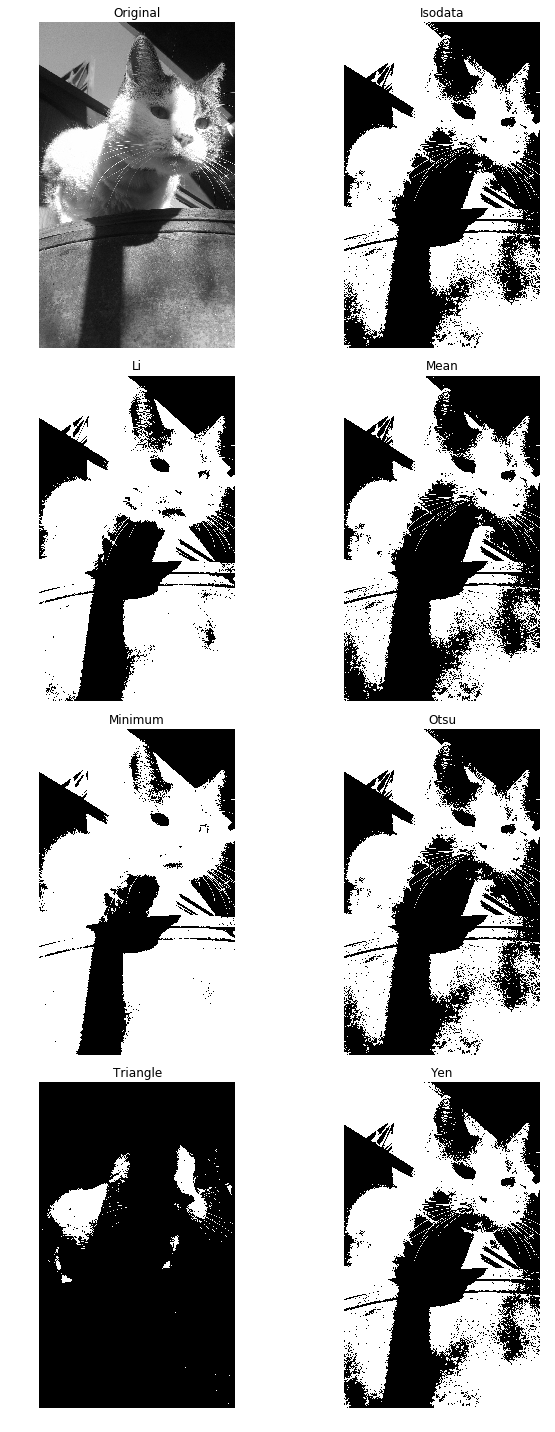

In [9]:
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(gato_grayscale, verbose=False, figsize=(10,20))
plt.show()

### 4- Filtros

Los filtros nos pueden ayudar a detectar contornos, suavizar contornos y enfatizar o remover caracteristicas de una imagen

Probemos primero con la deteccion de contornos

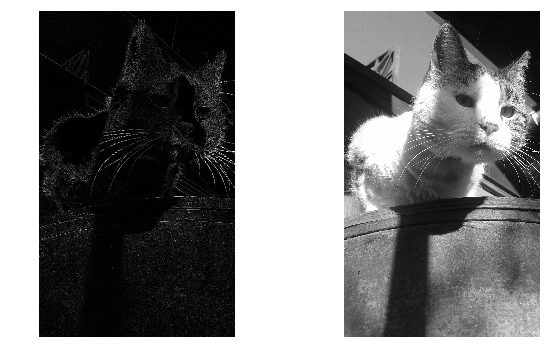

In [15]:
from skimage.filters import sobel

cat_sobel = sobel(gato_grayscale)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cat_sobel, cmap="gray")
plt.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(gato_grayscale, cmap="gray")
plt.axis('off')
plt.show()

Podemos usar otro filtro para suavizar los contornos

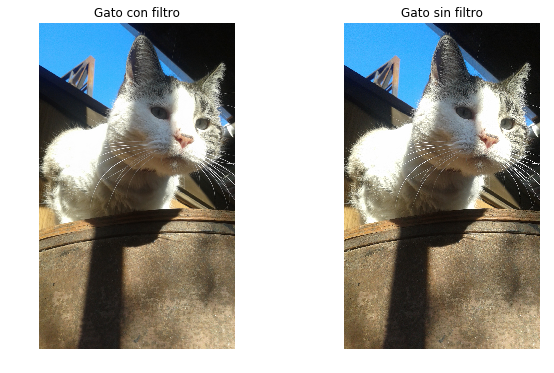

In [20]:
from skimage.filters import gaussian

# Aplicamos el filtro
gaussian_image = gaussian(gato, multichannel=True)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(gaussian_image, cmap="gray")
ax1.set_title("Gato con filtro")
plt.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(gato, cmap="gray")
ax2.set_title("Gato sin filtro")
plt.axis('off')
plt.show()

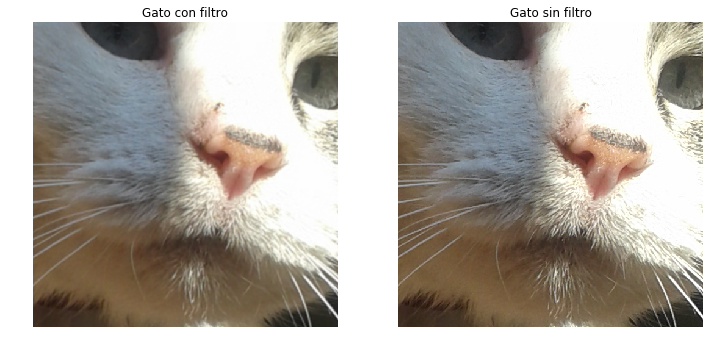

In [34]:
# Si hacemos zoom en la nariz se nota que la foto de
# la izquierda tiene los bordes mas suaves

fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(gaussian_image[700:1200, 800:1300, :], cmap="gray")
ax1.set_title("Gato con filtro")
plt.axis('off')
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(gato[700:1200, 800:1300, :], cmap="gray")
ax2.set_title("Gato sin filtro")
plt.axis('off')
plt.show()